# IRIS - Connection I
---
![Concatenate Layer](https://github.com/DrKAI/image/blob/main/Concatenate%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
iris = load_iris()

x = iris.data
y = iris.target

In [3]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.2, random_state=2021)

In [6]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((120, 4), (120,), (30, 4), (30,))

## **length끼리, width끼리**

In [7]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [8]:
tr_x_l = train_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
tr_x_w = train_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

In [9]:
tr_x_l.shape, tr_x_w.shape

((120, 2), (120, 2))

In [10]:
te_x_l = test_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
te_x_w = test_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

## One-hot Encoding

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)


In [13]:
train_y.shape

(120, 3)

## Modeling : multi-input & Concatenate layer

In [14]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [15]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기 : input 2개!
il_l = Input( shape=(2,) )
hl_l = Dense(2, activation=relu)(il_l)

il_w = Input( shape=(2,) )
hl_w = Dense(2, activation=relu)(il_w)

cl = Concatenate()([hl_l, hl_w])
ol = Dense(3, activation=softmax)(cl)

# 3. 모델 시작과 끝 지정
model = Model([il_l, il_w], ol)

# 4. 모델 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer=Adam())

## 모델 시각화

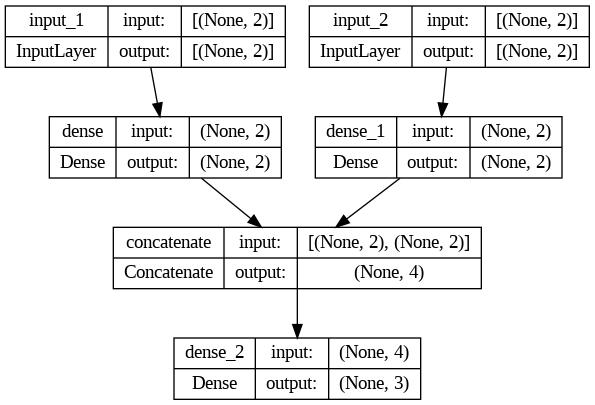

In [16]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [17]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=30,
                   verbose=1,
                   restore_best_weights=True)

In [18]:
model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.15,
          epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 4s 415ms/step - loss: 1.6561 - accuracy: 0.3627 - val_loss: 1.5859 - val_accuracy: 0.3889
Epoch 2/1000
4/4 [==============================] - 0s 71ms/step - loss: 1.6350 - accuracy: 0.3627 - val_loss: 1.5662 - val_accuracy: 0.3889
Epoch 3/1000
4/4 [==============================] - 0s 65ms/step - loss: 1.6145 - accuracy: 0.3627 - val_loss: 1.5470 - val_accuracy: 0.3889
Epoch 4/1000
4/4 [==============================] - 0s 71ms/step - loss: 1.5941 - accuracy: 0.3627 - val_loss: 1.5285 - val_accuracy: 0.3889
Epoch 5/1000
4/4 [==============================] - 0s 62ms/step - loss: 1.5752 - accuracy: 0.3627 - val_loss: 1.5105 - val_accuracy: 0.3889
Epoch 6/1000
4/4 [==============================] - 0s 63ms/step - loss: 1.5567 - accuracy: 0.3627 - val_loss: 1.4932 - val_accuracy: 0.3889
Epoch 7/1000
4/4 [==============================] - 0s 48ms/step - loss: 1.5393 - accuracy: 0.3627 - val_loss: 1.4766 - val_accuracy: 0.3889
Epoch 8/1000

---
---
---
---
---

# IRIS - Connection I practice

- 위의 코드를 **그대로** 따라서 코드 작성하기!

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [75]:
iris = load_iris()

x = iris.data
y = iris.target
x.shape, y.shape

((150, 4), (150,))

In [76]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x = scaler.transform(x)

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_x,y,test_size=0.3,random_state=1)

## **length끼리, width끼리**

In [79]:
xtr_f1 = x_train.loc[ :, ['sepal length (cm)','petal length (cm)'] ]
xtr_f2 = x_train.loc[ :, ['sepal width (cm)', 'petal width (cm)'] ]
xts_f1 = x_test.loc[ :, ['sepal length (cm)','petal length (cm)'] ]
xts_f2 = x_test.loc[ :, ['sepal width (cm)', 'petal width (cm)'] ]
xtr_f1.head(2),xtr_f2.head(2)

(     sepal length (cm)  petal length (cm)
 118                7.7                6.9
 18                 5.7                1.7,
      sepal width (cm)  petal width (cm)
 118               2.6               2.3
 18                3.8               0.3)

In [80]:
xtr_f1.shape, xtr_f2.shape

((105, 2), (105, 2))

## One-hot Encoding

In [81]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[:3]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## Modeling : multi-input & Concatenate layer

In [82]:
from tensorflow.keras.layers import Input, Dense, Concatenate

In [83]:
### modeling ###
# clear session
keras.backend.clear_session()

# set layer
il1 = Input(shape=2)
hl1 = Dense(64,activation='relu')(il1)
hl1 = Dense(64,activation='relu')(hl1)
hl1 = Dense(32,activation='relu')(hl1)

il2 = Input(shape=2)
hl2 = Dense(64,activation='relu')(il2)
hl2 = Dense(64,activation='relu')(hl2)
hl2 = Dense(32,activation='relu')(hl2)

cl = Concatenate()([hl1,hl2])
ol = Dense(3,activation='softmax')(cl)

# set model
model = keras.models.Model([il1,il2],ol)

# compile model
model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='adam')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           192         ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 64)           192         ['input_2[0][0]']                
                                                                                              

## 모델 시각화

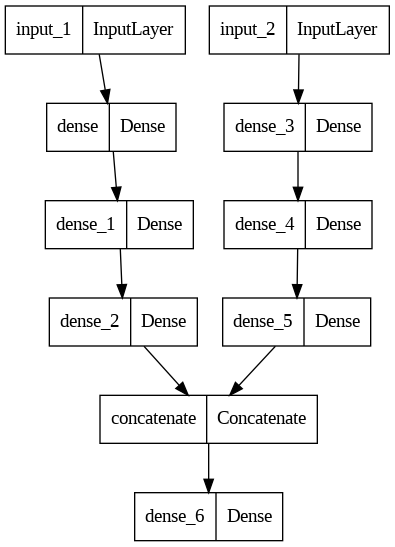

In [84]:
plot_model(model)

## 학습 시켜보기!

In [85]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1,\
                   min_delta=0, restore_best_weights=True)

In [86]:
model.fit([xtr_f1,xtr_f2],y_train,validation_split=0.2,callbacks=[es],epochs=1000)

Epoch 1/1000
3/3 [==============================] - 2s 153ms/step - loss: 1.1007 - acc: 0.3333 - val_loss: 0.9961 - val_acc: 0.5238
Epoch 2/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.9654 - acc: 0.7381 - val_loss: 1.0409 - val_acc: 0.5238
Epoch 3/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8988 - acc: 0.7381 - val_loss: 1.0359 - val_acc: 0.5238
Epoch 4/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8415 - acc: 0.7381 - val_loss: 0.9832 - val_acc: 0.5238
Epoch 5/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.7835 - acc: 0.7381 - val_loss: 0.9068 - val_acc: 0.5238
Epoch 6/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.7257 - acc: 0.7381 - val_loss: 0.8430 - val_acc: 0.5238
Epoch 7/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.6729 - acc: 0.7381 - val_loss: 0.7773 - val_acc: 0.5238
Epoch 8/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.6224 - 

In [87]:
y_pred = model.predict([xts_f1,xts_f2])

2/2 [==============================] - 0s 8ms/step


In [88]:
print(y_pred.argmax(axis=1))
print(y_test.argmax(axis=1))
print(y_pred.argmax(axis=1) == y_test.argmax(axis=1))

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
